In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('C:/Users/HP/Documents/Stock Prediction/BAJFINANCE.csv')

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [4]:
df.set_index('Date',inplace=True)

In [5]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

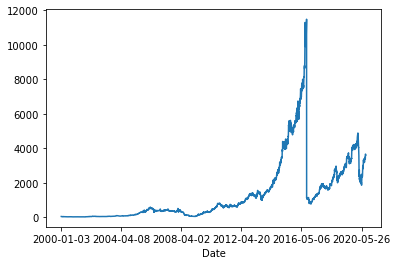

In [6]:
df['VWAP'].plot()

In [8]:
df.shape

(5070, 14)

In [9]:
df.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5070 entries, 2000-01-03 to 2020-08-31
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              5070 non-null   object 
 1   Series              5070 non-null   object 
 2   Prev Close          5070 non-null   float64
 3   Open                5070 non-null   float64
 4   High                5070 non-null   float64
 5   Low                 5070 non-null   float64
 6   Last                5070 non-null   float64
 7   Close               5070 non-null   float64
 8   VWAP                5070 non-null   float64
 9   Volume              5070 non-null   int64  
 10  Turnover            5070 non-null   float64
 11  Trades              2291 non-null   float64
 12  Deliverable Volume  4624 non-null   float64
 13  %Deliverble         4624 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 594.1+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trades', ylabel='Density'>

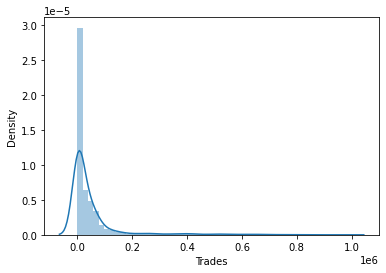

In [11]:
sns.distplot(df['Trades'])

In [12]:
df.fillna(df['Trades'].median(),inplace=True)

In [13]:
df.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [15]:
df.shape

(5070, 14)

In [16]:
data=df.copy()

In [17]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [21]:
lag_features=['High','Low','Volume','Turnover','Trades']
windows_1=3
windows_2=7

In [23]:
for i in lag_features:
    data[i+'rolling_mean_3']=data[i].rolling(window=windows_1).mean()
    data[i+'rolling_mean_7']=data[i].rolling(window=windows_2).mean()

In [24]:
for i in lag_features:
    data[i+'rolling_std_3']=data[i].rolling(window=windows_1).std()
    data[i+'rolling_std_7']=data[i].rolling(window=windows_2).std()

In [25]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,...,2.911615,NaN,1.656301,NaN,2074.447718,NaN,1.117075e+10,NaN,0.0,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,...,3.817504,NaN,2.909181,NaN,1352.774926,NaN,5.999789e+09,NaN,0.0,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,...,1.026320,NaN,1.473092,NaN,1558.845727,NaN,6.822312e+09,NaN,0.0,NaN


In [26]:
data.isnull().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [27]:
data.dropna(inplace=True)

In [28]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [29]:
in_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [31]:
data.shape

(5064, 34)

In [32]:
train=data[0:1800]
test=data[1800:]

In [48]:
train.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,BAJAUTOFIN,EQ,42.9,42.00,42.0,39.5,40.25,40.1,40.25,5500,...,3.000556,3.709528,1.258306,3.052712,1006.644591,1466.125441,3.353967e+09,7.780466e+09,0.0,0.0
2000-01-12,BAJAUTOFIN,EQ,40.1,40.00,40.0,39.0,39.00,39.0,39.80,1000,...,2.463737,4.300664,1.040833,3.087610,2400.694344,1722.401424,9.915353e+09,7.711740e+09,0.0,0.0
2000-01-13,BAJAUTOFIN,EQ,39.0,40.00,41.0,38.5,39.50,39.5,39.37,1000,...,1.000000,3.191880,0.500000,2.146980,2598.076211,2045.901827,1.049654e+10,8.903806e+09,0.0,0.0
2000-01-14,BAJAUTOFIN,EQ,39.5,39.00,40.5,39.0,39.90,39.9,39.72,1700,...,0.500000,3.097849,0.288675,1.513117,404.145188,2173.870807,1.612971e+09,9.499372e+09,0.0,0.0
2000-01-17,BAJAUTOFIN,EQ,39.9,39.05,41.0,38.4,39.20,39.2,39.84,3100,...,0.288675,2.915721,0.321455,1.359797,1069.267662,1782.053390,4.282258e+09,7.480525e+09,0.0,0.0


In [33]:
!pip install pmdarima

In [34]:
from pmdarima import auto_arima

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
model=auto_arima(y=train['VWAP'],X=train[in_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22877.051, Time=2.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 2.193 seconds


In [40]:
model.fit(train['VWAP'],train[in_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [42]:
forecast=model.predict( n_periods=len(test),X=test[in_features])

In [47]:
test.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7,Forecast_ARIMA
Date,,,,,,,,,,,,,,,,,,,,,
2007-06-26,BAJAUTOFIN,EQ,367.10,370.0,370.0,355.05,358.0,359.95,360.72,21485,...,6.902958,4.940226,7.773857,8528.768434,9684.398440,3.094386e+11,3.571019e+11,0.0,0.0,365.027401
2007-06-27,BAJAUTOFIN,EQ,359.95,365.0,390.0,361.00,370.1,373.90,375.01,58598,...,6.971472,4.195931,7.328077,26481.808404,18178.631364,9.995954e+11,6.825314e+11,0.0,0.0,370.316745
2007-06-28,BAJAUTOFIN,EQ,373.90,375.0,390.0,374.00,380.0,379.35,382.66,24951,...,8.093295,9.691104,6.451532,20500.034691,16286.163502,7.745917e+11,6.136524e+11,0.0,0.0,377.249867
2007-06-29,BAJAUTOFIN,EQ,379.35,374.0,384.0,374.00,378.0,378.50,380.15,2480,...,8.233873,7.505553,7.082062,28243.867694,18269.337458,1.057364e+12,6.862843e+11,0.0,0.0,381.122249
2007-07-02,BAJAUTOFIN,EQ,378.50,380.1,382.0,376.00,380.0,379.65,379.54,4092,...,7.989368,1.154701,7.970384,12534.234892,19338.813799,4.801605e+11,7.255603e+11,0.0,0.0,381.101270


In [43]:
test['Forecast_ARIMA']=forecast

<AxesSubplot:xlabel='Date'>

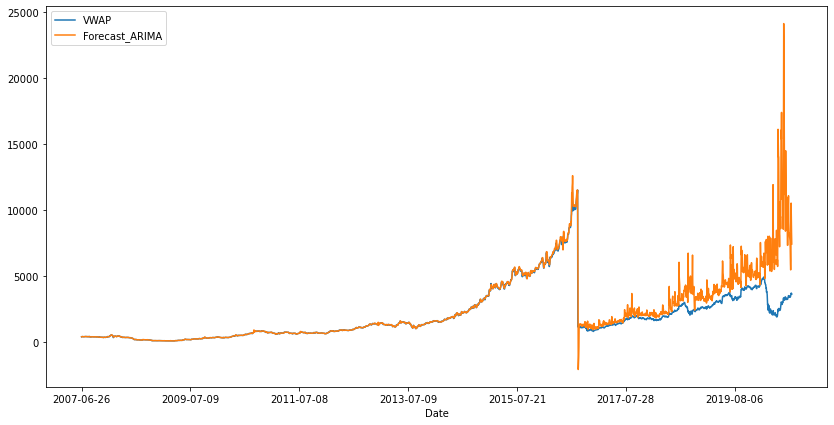

In [50]:
test[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [52]:
np.sqrt(mean_squared_error(test['VWAP'],test['Forecast_ARIMA']))

1448.6706773637488

In [54]:
mean_absolute_error(test['VWAP'],test['Forecast_ARIMA'])

446.34787715167914